In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(10,6)

Question 1

In [2]:
train = pd.read_csv('train.csv')

##handling missing value
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

##Build a linear model
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)


In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((978, 36), (482, 36), (978,), (482,))

In [4]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
##Evaluate the performance and visualize results

print ("R^2 is: \n", round(model.score(X_test, y_test),3))
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', round(mean_squared_error(y_test, predictions),3))


R^2 is: 
 0.863
RMSE is: 
 0.023


Calculating Z score to determine the outliers and then removing them from the data. 

AxesSubplot(0.125,0.125;0.775x0.755)


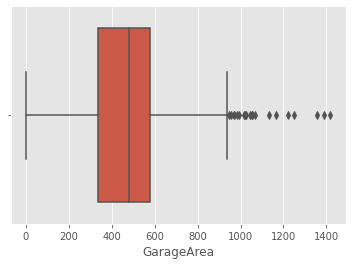

In [5]:
import seaborn as sns #importing seaborn 

print(sns.boxplot(x=train.GarageArea)) #plotting 

AxesSubplot(0.125,0.125;0.775x0.755)


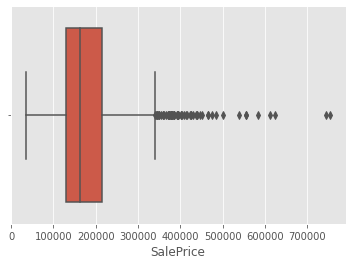

In [6]:
print(sns.boxplot(x=train.SalePrice)) #plotting

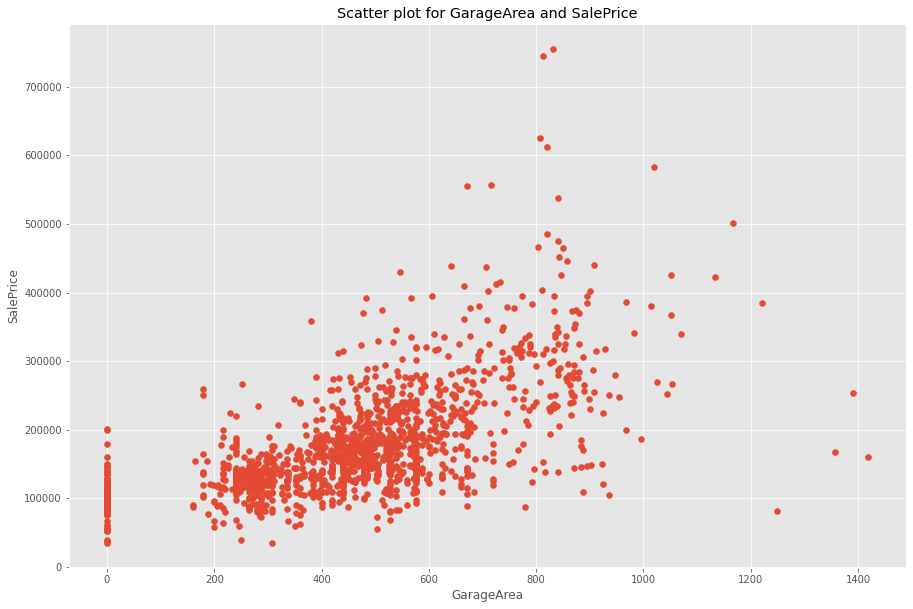

In [7]:
#Making scatter plot 
fig, ax = plt.subplots(figsize=(15,10)) # assiging the axis 
ax.scatter(train.GarageArea,train.SalePrice) # making scatter plot
plt.title('Scatter plot for GarageArea and SalePrice')
ax.set_xlabel('GarageArea') # axis x
ax.set_ylabel('SalePrice') # axis y
plt.show()  # displaying data

Calcuating the Z Score

In [8]:
from scipy import stats
pd.set_option('display.max_colwidth',1000)

z_score_lst =[] #creating list of z score
z_score = np.abs(stats.zscore(X['GarageArea']))
for i in z_score:
  z_score_lst.append(i)

print(z_score_lst)

[0.35100032086652694, 0.060731012615303295, 0.6317262300586839, 0.7908042452675729, 1.6984846849888804, 0.03284429044874903, 0.7627316543483571, 0.05155935106155949, 0.023300891389682367, 1.2538161266819705, 0.41631716425870213, 1.2306081696686189, 0.5660376491611858, 1.7171997456016908, 0.5660376491611858, 0.4820057451562002, 0.03284429044874903, 0.20127983596404322, 0.4820057451562002, 0.8374060280469375, 1.7780236925933248, 0.9029087401917743, 0.2854976087216903, 0.46329068454338973, 0.9496963917238004, 1.9511380032618217, 0.4820057451562002, 1.399043715183913, 0.7204368992168722, 1.0900593463198789, 1.0432716947878526, 0.9450176265705977, 0.05155935106155949, 0.12155495960693731, 0.3884304420921479, 1.020063737774501, 0.9311671998636514, 0.11706206320639612, 1.0619867554006632, 2.2129629830885067, 0.15430631567935563, 0.7719033159021009, 0.14513465412561183, 0.7719033159021009, 0.8093334371277219, 0.4820057451562002, 0.9218096695572461, 1.6516970334568541, 2.2129629830885067, 0.406

In [9]:
outlier_lst = [] #makig list of all the outliers

for i in z_score: #for loop to put into a list
  if np.where(z_score > 3): # the threshold is 3
    outlier_lst.append(i)
  
print(outlier_lst) #printing the outliers

[0.35100032086652694, 0.060731012615303295, 0.6317262300586839, 0.7908042452675729, 1.6984846849888804, 0.03284429044874903, 0.7627316543483571, 0.05155935106155949, 0.023300891389682367, 1.2538161266819705, 0.41631716425870213, 1.2306081696686189, 0.5660376491611858, 1.7171997456016908, 0.5660376491611858, 0.4820057451562002, 0.03284429044874903, 0.20127983596404322, 0.4820057451562002, 0.8374060280469375, 1.7780236925933248, 0.9029087401917743, 0.2854976087216903, 0.46329068454338973, 0.9496963917238004, 1.9511380032618217, 0.4820057451562002, 1.399043715183913, 0.7204368992168722, 1.0900593463198789, 1.0432716947878526, 0.9450176265705977, 0.05155935106155949, 0.12155495960693731, 0.3884304420921479, 1.020063737774501, 0.9311671998636514, 0.11706206320639612, 1.0619867554006632, 2.2129629830885067, 0.15430631567935563, 0.7719033159021009, 0.14513465412561183, 0.7719033159021009, 0.8093334371277219, 0.4820057451562002, 0.9218096695572461, 1.6516970334568541, 2.2129629830885067, 0.406

<function matplotlib.pyplot.show>

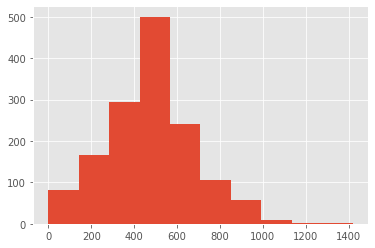

In [10]:
plt.hist(X['GarageArea'])
plt.show

In [11]:
#Printing the skew value
print("Skew before removing the outliers: ", X['GarageArea'].skew())
print('\n')
#printing the 10 percenttile and 90 percentile values 
print(X['GarageArea'].quantile(0.15))
print(X['GarageArea'].quantile(0.85))

Skew before removing the outliers:  0.17998090674623907


272.7
672.0


In [12]:
#setting the  outliers to be removed within  a certain range
X['GarageArea'] = np.where(X['GarageArea'] < 272.7, 272.7, X['GarageArea'])
X['GarageArea'] = np.where(X['GarageArea'] > 672.0, 672.0, X['GarageArea'])
print(X['GarageArea'].skew()) #checking the skew after the outlier were removed

-0.02061032445914435


<function matplotlib.pyplot.show>

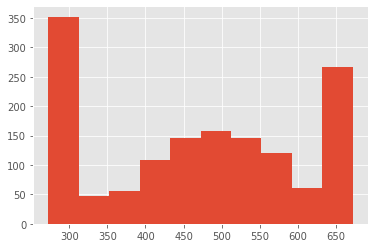

In [13]:
#plotting after remvoing the outliers
plt.hist(X['GarageArea'])
plt.show

Question 2

In [14]:
df = pd.read_csv('/content/data.csv') #opening the data 

#looking at the content and checking for null values in the dataset
print(df.describe(), '\n') 
print(df.head(5),'\n')
print(df.isnull().sum())

               Id          P1          P2  ...         P36         P37       revenue
count  137.000000  137.000000  137.000000  ...  137.000000  137.000000  1.370000e+02
mean    68.000000    4.014599    4.408759  ...    2.211679    1.116788  4.453533e+06
std     39.692569    2.910391    1.514900  ...    4.168211    1.790768  2.576072e+06
min      0.000000    1.000000    1.000000  ...    0.000000    0.000000  1.149870e+06
25%     34.000000    2.000000    4.000000  ...    0.000000    0.000000  2.999068e+06
50%     68.000000    3.000000    5.000000  ...    0.000000    0.000000  3.939804e+06
75%    102.000000    4.000000    5.000000  ...    3.000000    2.000000  5.166635e+06
max    136.000000   12.000000    7.500000  ...   20.000000    8.000000  1.969694e+07

[8 rows x 39 columns] 

   Id  City Group Type  P1   P2   P3  ...  P33  P34  P35  P36  P37  revenue
0   0  Big Cities   IL   4  5.0  4.0  ...    5    5    4    3    4  5653753
1   1  Big Cities   FC   4  5.0  4.0  ...    0    0    0  

In [15]:
#label encoding the categorical values 
label_encoder = LabelEncoder() 
df['City Group'] = label_encoder.fit_transform(df['City Group'])
df['Type'] = label_encoder.fit_transform(df['Type'])

In [16]:
y = np.log(df['revenue']) #target value 
x = df.drop(['revenue'],axis=1) #features 
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state=42) #traning the data

#modeling the data 
regression = linear_model.LinearRegression()
model = regression.fit(X_train, y_train) #fit the data

In [17]:
from sklearn.metrics import r2_score 

# testing the model and looking at the r^2 and rmse scores

print("Model score: ", round(model.score(X_test,y_test),3))
prediction = model.predict(X_test) #using test to predict the model 

from sklearn.metrics import mean_squared_error

print('rmse of the model: ', round(mean_squared_error(y_test, prediction),3))
r2_score = r2_score(y_test,prediction) # geting r2 score
print('The r2_score is: ', round(r2_score,3))

Model score:  -1.564
rmse of the model:  0.585
The r2_score is:  -1.564


Question 3

In [24]:
features = df.select_dtypes(include=[np.number])
corr = features.corr()
print(corr['revenue'].sort_values(ascending=False)[:10],'\n')

print(corr['revenue'].sort_values(ascending=False)[-10:],'\n')


revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
Name: revenue, dtype: float64 

P12          -0.062193
P32          -0.065857
P30          -0.066203
P34          -0.072343
P10          -0.073220
P8           -0.084215
Type         -0.090532
P13          -0.105085
P29          -0.114846
City Group   -0.237403
Name: revenue, dtype: float64 



In [38]:
y = np.log(df['revenue']) #target value 
x = df[['P2', 'P1', 'P7', 'P28','P29']] #features 
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state=42) #traning the data

#modeling the data 
regression = linear_model.LinearRegression()
model = regression.fit(X_train, y_train) #fit the data

In [39]:
from sklearn.metrics import r2_score 

# testing the model and looking at the r^2 and rmse scores

print("Model score: ", round(model.score(X_test,y_test),3))
prediction = model.predict(X_test) #using test to predict the model 

from sklearn.metrics import mean_squared_error

print('rmse of the model: ', round(mean_squared_error(y_test, prediction),3))
r2_score = r2_score(y_test,prediction) # geting r2 score
print('The r2_score is: ', round(r2_score,3))

Model score:  0.012
rmse of the model:  0.225
The r2_score is:  0.012


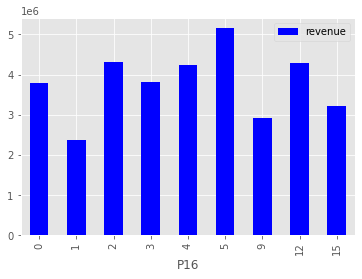

In [41]:
#creating piviot table to look at the correlation 
piviot = df.pivot_table(index="P16", values="revenue",
                        aggfunc=np.median)
piviot.plot(kind='bar', color='blue')
plt.show()

When comparing the results from question 2 to question 3, the overall score impoves after using correlation columns.